# Report 9: Hybrid evolutionary algorithm

* Radosław Winiecki, 148244
* Oskar Szudzik, 148245

Source code: https://github.com/Oskshust/evo_comp/tree/main/9

## Problem description:

In our case, a path is a Hamiltonian cycle formed by connecting 50% of the vertices that appear on a plane. The best path is the one for which the cost of taking it is the lowest.   

The goal is to implement a hybrid evolutionary algorithm (HEA) and compare it with the MSLS, ILS, and LNS
methods implemented in the previous assignments.

## HEA pseudocode

```py
def hea(matrix, finish_time):
    population = [steepest(matrix, random_solution(matrix)) for _ in range(20)]
    best_solution, best_cost = population[0]
    
    while current_time < finish_time:
        population = breed(population, matrix)
        
        current_best, current_best_cost = population[0][0], population[0][1]

        if current_best_cost < best_cost:
            best_solution, best_cost = current_best.copy(), current_best_cost

    return best_solution, best_cost


def breed(population, matrix, population_size=10):
    new_population = population.copy()
    costs_of_population = set(cost for sol, cost in new_population)
    i = 0

    while i < population_size:
        parent_1_id, parent_2_id = random.choice(len(population), 2, replace=False)
        parent_1, parent_2 = population[parent_1_id][0], population[parent_2_id][0]

        child_1, cost_1, child_2, cost_2 = get_children(parent_1, parent_2, matrix)

        while cost_1 in costs_of_population:
            child_1, cost_1 = operator_random_rep(parent_1, parent_2, matrix)

        while cost_2 in costs_of_population:
            child_2, cost_2 = operator_reg_rep(parent_2, parent_1, matrix)

        new_population.append((child_1, cost_1))
        new_population.append((child_2, cost_2))

        i += 1

    sort(new_population)

    return new_population[:population_size]


def get_children(parent_1, parent_2, matrix):
    child_1, cost_1 = operator_random_rep(parent_1, parent_2, matrix)
    child_2, cost_2 = operator_reg_rep(parent_1, parent_2, matrix)

    return child_1, cost_1, child_2, cost_2
```

### Recombination operator 1

```py
def operator_random_rep(parent_1, parent_2, matrix):
    # We locate in the offspring all common nodes and edges and fill the rest of the solution at random
    child = get_unfinished_child(parent_1, parent_2)

    for i in range(len(child)):
        available_nodes = list(set(range(200)) - set(child))
        if child[i] == -1:
            child[i] = random.choice(available_nodes, 1)[0]

    return child, calculate_cost(child, matrix)
```

### Recombination operator 2

```py
def operator_reg_rep(parent_1, parent_2, matrix):
    return weighted_regret(matrix, get_unfinished_child(parent_1, parent_2))
```

#### Utility functions

```py
def get_unfinished_child(parent_1, parent_2):
    child = np.array([-1 for i in range(100)])

    for i in range(len(parent_2) - 1):
        if parent_2[i] in parent_1 and parent_2[i+1] in parent_1:
            index_1 = np.where(parent_1 == parent_2[i])[0]
            index_2 = np.where(parent_1 == parent_2[i+1])[0]
            if abs(index_1 - index_2) == 1:
                child[index_1] = parent_1[index_1]
                child[index_2] = parent_1[index_2]

    for node in parent_2:
        if node in parent_1:
            index = np.where(parent_1 == node)[0][0]
            child[index] = node
    
    return child
```

Average time per iteration: 31.644096415100858 s
Average iterations: 45.9
Results: 76001.25(75057 - 76697)
Best solution: [0, 1, 4, 5, 6, 8, 11, 14, 15, 19, 20, 21, 22, 26, 27, 31, 32, 36, 37, 40, 41, 43, 45, 48, 50, 51, 53, 55, 59, 61, 62, 64, 66, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 91, 94, 95, 96, 98, 101, 102, 106, 108, 109, 110, 111, 112, 113, 114, 116, 117, 119, 121, 123, 124, 127, 128, 130, 132, 134, 135, 141, 143, 144, 147, 149, 152, 153, 154, 155, 156, 159, 161, 163, 164, 167, 169, 171, 175, 177, 178, 185, 186, 189, 190, 192, 194, 195, 199]


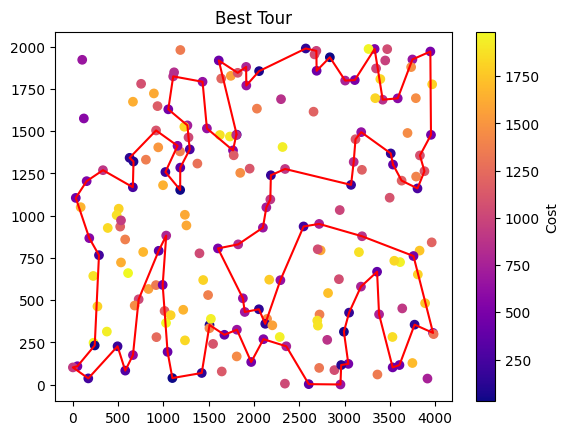

In [2]:
run_hea(a)

Average time per iteration: 31.790754601108404 s
Average iterations: 45.85
Results: 68976.45(67940 - 69754)
Best solution: [0, 2, 5, 8, 12, 16, 18, 19, 24, 25, 29, 31, 32, 33, 34, 36, 37, 38, 44, 50, 51, 52, 55, 57, 58, 59, 63, 64, 66, 67, 69, 70, 71, 72, 73, 79, 80, 82, 85, 88, 89, 91, 92, 95, 99, 101, 103, 107, 112, 113, 114, 115, 117, 119, 121, 122, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 142, 143, 145, 147, 148, 150, 152, 153, 154, 156, 157, 159, 162, 163, 165, 169, 171, 172, 174, 179, 181, 182, 183, 185, 188, 189, 190, 193, 196, 197, 198]


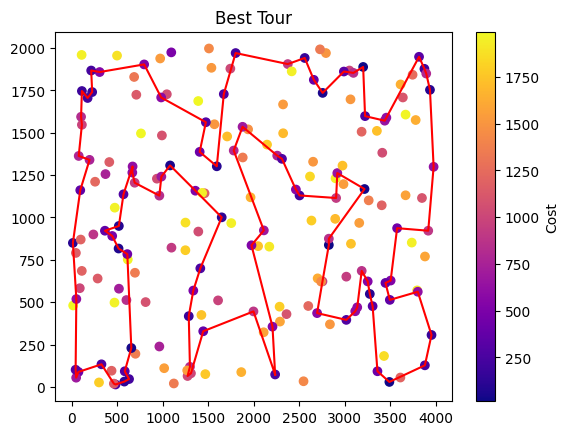

In [ ]:
run_hea(b)

Average time per iteration: 33.24499566608076 s
Average iterations: 43.8
Results: 49829.65(49087 - 50460)
Best solution: [0, 1, 4, 5, 6, 8, 11, 12, 14, 20, 21, 22, 27, 31, 32, 36, 40, 43, 48, 50, 51, 53, 55, 59, 60, 61, 62, 64, 66, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 89, 91, 92, 93, 94, 95, 96, 98, 101, 102, 106, 108, 111, 112, 113, 114, 116, 117, 119, 121, 123, 124, 126, 127, 128, 130, 132, 135, 138, 141, 143, 144, 147, 149, 152, 153, 154, 155, 156, 159, 160, 161, 163, 164, 167, 169, 171, 177, 178, 180, 181, 185, 186, 189, 190, 192, 195, 198, 199]


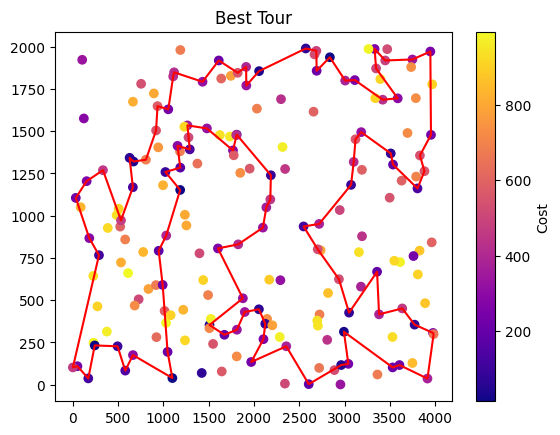

In [ ]:
run_hea(c)

Average time per iteration: 33.55882701797223 s
Average iterations: 43.4
Results: 46234.35(45253 - 47031)
Best solution: [0, 3, 4, 5, 8, 12, 16, 18, 19, 24, 25, 29, 31, 33, 34, 36, 37, 38, 44, 47, 50, 51, 52, 53, 55, 57, 58, 59, 61, 63, 64, 65, 66, 67, 68, 71, 72, 73, 79, 80, 82, 88, 89, 91, 92, 94, 95, 99, 101, 103, 107, 112, 114, 115, 117, 119, 121, 122, 123, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 142, 143, 145, 147, 148, 150, 152, 153, 154, 156, 157, 159, 162, 165, 166, 172, 174, 179, 183, 185, 189, 190, 192, 193, 194, 196, 197, 198]


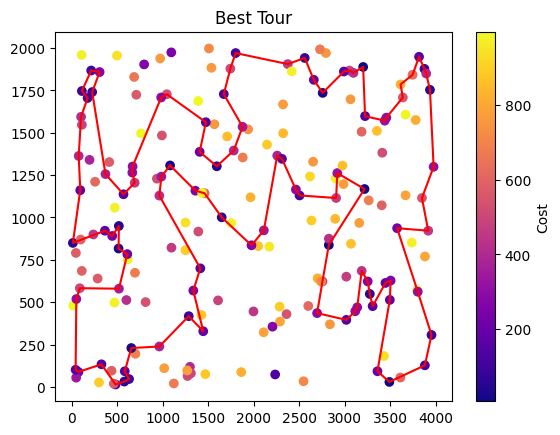

In [ ]:
run_hea(d)

### Objective function values:

| Algorithm | Instance A  | Instance B   | Instance C   | Instance D   |
|-----------|----------|----------|----------|----------|
| MSLS (baseline) | 75093.15(74399 - 75615) | 68222.2(67457 - 68718) |  49098.0(48636 - 49552) | 45526.9(45068 - 46057) |
| ILS | 73835.35(73526 - 74142) | 67134.0(66761 - 67455) | 48226.4(47776 - 49000) | 44217.2(43837 - 44909) |
| LNS | 78267.65(76761 - 79963) | 71671.3(69239 - 75228) | 51772.05(49396 - 53718) | 48516.45(46058 - 50472) |
| LNS_without_LS | 78290.5(76676 - 80016) | 71229.05(69547 - 74454) | 51617.35(50364 - 53947) | 48117.5(45769 - 51529) |
| HEA | 76001.25(75057 - 76697) | 68976.45(67940 - 69754) | 49829.65(49087 - 50460) | 46234.35(45253 - 47031) |

### Average time per instance values (in seconds):

| Methods | Instance A | Instance B | Instance C | Instance D |
|-----------|----------|----------|----------|----------|
| baseline | 7.146 | 7.249 | 7.368 | 7.092 |
| ILS | 1.680 | 1.741 | 1.746 | 1.761 |
| LNS | 1.790 | 1.535 | 1.521 | 1.419 |
| LNS_without_LS | 0.330 | 0.342 | 0.330 | 0.342 |
| HEA | 31.644 | 31.790 | 33.244 | 33.558 |

### Average number of iterations per run for ILS:

| Methods | Instance A | Instance B | Instance C | Instance D |
|-----------|----------|----------|----------|----------|
| ILS | 860.0 | 830.0 | 826.2 | 820.8 |
| LNS | 806.5 | 939.4 | 948.45 | 1015.8 |
| LNS_without_LS | 4359.65 | 4204.75 | 4358.9 | 4200.9 |
| HEA | 45.9 | 45.85 | 43.8 | 43.4 |

### Conclusions:

* We observed that performance was better than LNS (with and without LS) and at the same time worse than ILS and MSLS across all instances.
* Average time per instance got much larger, therefore lowering the average number of iterations per run.